<a href="https://colab.research.google.com/github/dangtrantrung/Build_Neural_Network_with_TensorFlow_TensorBoard.ipynb/blob/master/Build_Neural_Network_with_TensorFlow_TensorBoard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [6]:
# Operations in Computational Graph
import numpy as np
x_vals=np.array([1.,3.,5.,7.,9.])
x_data=tf.Variable(x_vals,dtype=tf.float32)
m_const=tf.constant(3.)
operation=tf.multiply(x_data,m_const)
for result in operation:
  print(result.numpy())


3.0
9.0
15.0
21.0
27.0


In [7]:
operation

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([ 3.,  9., 15., 21., 27.], dtype=float32)>

In [8]:
# Combine operations to layers Graph
import numpy as np
my_array=np.array([[1.,3.,5.,7.,9.],[-2.,0.,2.,4.,6.],[-6.,-3.,0,3.,6.]])
x_vals=np.array([my_array,my_array+1])
x_data=tf.Variable(x_vals,dtype=tf.float32)
x_data

<tf.Variable 'Variable:0' shape=(2, 3, 5) dtype=float32, numpy=
array([[[ 1.,  3.,  5.,  7.,  9.],
        [-2.,  0.,  2.,  4.,  6.],
        [-6., -3.,  0.,  3.,  6.]],

       [[ 2.,  4.,  6.,  8., 10.],
        [-1.,  1.,  3.,  5.,  7.],
        [-5., -2.,  1.,  4.,  7.]]], dtype=float32)>

In [13]:
m1=tf.constant([[1.],[0.,],[-1.],[2.],[4.]])
m2=tf.constant([[2.]])
a1=tf.constant([[10.]])

In [14]:
# Operation layer
def prod1(a,b):
  return tf.matmul(a,b)
def prod2(a,b):
  return tf.matmul(a,b)
def add1(a,b):
  return tf.add(a,b)

In [15]:
result = add1(prod2(prod1(x_data,m1),m2),a1)
print(result.numpy())

[[[102.]
  [ 66.]
  [ 58.]]

 [[114.]
  [ 78.]
  [ 70.]]]


In [17]:
class Operations():
  def __init__(self,a):
    self.result=a
  def apply(self,func,b):
    self.result=func(self.result,b)
    return self


operation= (Operations(a=x_data)
            .apply(prod1,b=m1)
            .apply(prod2,b=m2)
            .apply(add1,b=a1))

print(operation.result.numpy())

[[[102.]
  [ 66.]
  [ 58.]]

 [[114.]
  [ 78.]
  [ 70.]]]


In [20]:
v=tf.Variable(initial_value=tf.random.normal(shape=(1,5)),shape=tf.TensorShape((None,5)))
print(v)
v.assign(tf.random.normal(shape=(10,5)))


<tf.Variable 'Variable:0' shape=(None, 5) dtype=float32, numpy=
array([[ 0.77985424,  0.4189272 ,  0.28743383, -0.28957883, -1.4866134 ]],
      dtype=float32)>


<tf.Variable 'UnreadVariable' shape=(None, 5) dtype=float32, numpy=
array([[-9.1043794e-01, -6.4090574e-01, -1.4346770e-02,  7.2459394e-01,
         6.4218283e-01],
       [ 2.4551943e-01,  6.9101554e-01, -9.9568504e-01, -1.3748221e+00,
        -8.0650026e-01],
       [-5.0495321e-01, -6.8398291e-01, -8.1360959e-02,  3.5009468e-01,
        -7.6194227e-01],
       [ 5.1603782e-01, -1.0668690e+00, -8.4814680e-01, -9.0293336e-01,
         5.8693539e-02],
       [-1.1533327e+00, -1.0505022e+00,  2.2397106e+00,  1.0953990e+00,
        -6.6672206e-01],
       [-2.8739545e-01,  5.4638511e-01, -7.5871468e-01,  5.9092028e-05,
        -1.2933551e+00],
       [-7.7661163e-01, -2.4143827e-01, -3.8880882e-01, -7.5241536e-01,
        -2.6071328e-01],
       [-6.7213768e-01, -1.1239169e+00,  2.0238143e-01, -7.1488947e-02,
        -5.9606659e-01],
       [-1.1638843e+00,  2.3196025e+00,  5.8269161e-01, -2.6245821e-01,
         4.9111804e-01],
       [-5.5813754e-01,  3.7633993e-02,  1.7015485e+00, -1.

In [22]:
# Work with Many Layers
batch_size=[1]
x_shape=[4,4,1]
x_data=tf.random.uniform(shape=batch_size+x_shape)
x_data


<tf.Tensor: shape=(1, 4, 4, 1), dtype=float32, numpy=
array([[[[0.73823225],
         [0.43884516],
         [0.7128775 ],
         [0.0754472 ]],

        [[0.7835065 ],
         [0.8864335 ],
         [0.8842263 ],
         [0.9404273 ]],

        [[0.05130053],
         [0.25393367],
         [0.620363  ],
         [0.40637982]],

        [[0.02085066],
         [0.47699058],
         [0.73302424],
         [0.02248144]]]], dtype=float32)>

In [24]:
def mov_avg_layer(x):
  my_filter=tf.constant(0.25,shape=[2,2,1,1])
  my_strides=[1,2,2,1]
  layer=tf.nn.conv2d(x,my_filter,my_strides,padding="SAME",name="Moving_Avg_Window")
  return layer


In [25]:
def custom_layer(input_matrix):
  input_matrix_squeezed=tf.squeeze(input_matrix)
  A=tf.constant([[1.,2.],[-1.,3.]])
  b=tf.constant(1.,shape=[2,2])
  temp1=tf.matmul(A,input_matrix_squeezed)
  temp=tf.add(temp1,b) # Ax+b
  return(tf.sigmoid(temp))


In [29]:
first_layer=mov_avg_layer(x_data)
second_layer=custom_layer(first_layer)

In [28]:
print(second_layer)

tf.Tensor(
[[0.89218843 0.9271943 ]
 [0.70900416 0.84335977]], shape=(2, 2), dtype=float32)


In [30]:
# Build LOSS functions
import matplotlib.pyplot as plt

In [50]:
def l2(y_true,y_pred):
  return tf.square(y_true-y_pred)
def l1(y_true,y_pred):
  return tf.abs(y_true-y_pred)
def phuber1(y_true,y_pred):
  delta1=tf.constant(0.25)
  return tf.multiply(tf.square(delta1),tf.sqrt(1.+tf.square((y_true-y_pred)/delta1))-1.)
def phuber2(y_true,y_pred):
  delta2=tf.constant(5.)
  return tf.multiply(tf.square(delta2),tf.sqrt(1.+tf.square((y_true-y_pred)/delta2))-1.)

def hinge(y_true, y_pred):
    return tf.maximum(0., 1. - tf.multiply(y_true, y_pred))
def xentropy(y_true, y_pred):
    return (- tf.multiply(y_true, tf.math.log(y_pred)) -
          tf.multiply((1. - y_true), tf.math.log(1. - y_pred)))
def xentropy_sigmoid(y_true, y_pred):
    return tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true,
                                                   logits=y_pred)
def xentropy_weighted(y_true, y_pred):
    weight = tf.constant(0.5)
    return tf.nn.weighted_cross_entropy_with_logits(labels=y_true,
                                                    logits=y_pred,
                                                pos_weight=weight)
def softmax_xentropy(y_true, y_pred):
    return tf.nn.softmax_cross_entropy_with_logits(labels=y_true,                                                    logits=y_pred)

unscaled_logits = tf.constant([[1., -3., 10.]])
target_dist = tf.constant([[0.1, 0.02, 0.88]])
print(softmax_xentropy(y_true=target_dist,y_pred=unscaled_logits))


tf.Tensor([1.1601256], shape=(1,), dtype=float32)


In [51]:
def sparse_xentropy(y_true, y_pred):
    return tf.nn.sparse_softmax_cross_entropy_with_logits(
                                                    labels=y_true,
                                                    logits=y_pred)
unscaled_logits = tf.constant([[1., -3., 10.]])
sparse_target_dist = tf.constant([2])
print(sparse_xentropy(y_true=sparse_target_dist,
                      y_pred=unscaled_logits))

tf.Tensor([0.00012564], shape=(1,), dtype=float32)


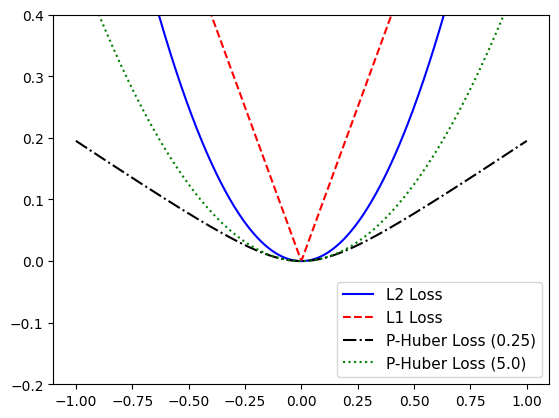

In [52]:
# How it works...
# Here is how to use matplotlib to plot the regression loss functions:
x_vals = tf.linspace(-1., 1., 500)
target = tf.constant(0.)
funcs = [(l2, 'b-', 'L2 Loss'),
         (l1, 'r--', 'L1 Loss'),
         (phuber1, 'k-.', 'P-Huber Loss (0.25)'),
         (phuber2, 'g:', 'P-Huber Loss (5.0)')]
for func, line_type, func_name in funcs:
    plt.plot(x_vals, func(y_true=target, y_pred=x_vals),
             line_type, label=func_name)
plt.ylim(-0.2, 0.4)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()

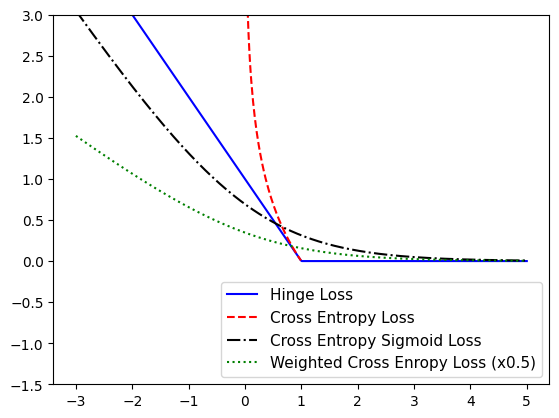

In [53]:
# use matplotlib to plot the various classification loss functions:

x_vals = tf.linspace(-3., 5., 500)
target = tf.fill([500,], 1.)
funcs = [(hinge, 'b-', 'Hinge Loss'),
         (xentropy, 'r--', 'Cross Entropy Loss'),
         (xentropy_sigmoid, 'k-.', 'Cross Entropy Sigmoid Loss'),
         (xentropy_weighted, 'g:', 'Weighted Cross Enropy Loss (x0.5)')]
for func, line_type, func_name in funcs:
    plt.plot(x_vals, func(y_true=target, y_pred=x_vals), line_type, label=func_name)
plt.ylim(-1.5, 3)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()


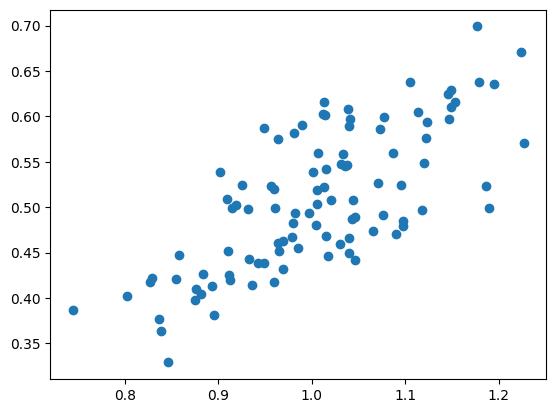

In [55]:
# BackPropagation in TensorFlow
np.random.seed(0)
x_vals=np.random.normal(1,0.1,100).astype(np.float32)
y_vals=(x_vals*(np.random.normal(1,0.05,100)-0.5)).astype(np.float32)
plt.scatter(x_vals,y_vals)
plt.show()



In [56]:
def my_output(X,weights,biases):
  return tf.add(tf.multiply(X,weigths),biases)

In [58]:
def loss_func(y_true,y_pred):
  return tf.reduce_mean(tf.square(y_pred-y_true))

In [ ]:
my_opt=tf.optimizers.SCD(learning_rate=0.02)

In [60]:
tf.random.set_seed(1)
np.random.seed(0)
weigths=tf.Variable(tf.random.normal(shape=[1]))
biases=tf.Variable(tf.random.normal(shape=[1]))
history=list()

for i in range(100):
  rand_index=np.random.choice(100)
  rand_x=[x_vals[rand_index]]
  rand_y=[y_vals[rand_index]]
  with tf.GradientTape() as tape:
    predictions = my_output(x_vals,weights,biases)
    loss=loss_func(rand_y,predictions)
  history.append(loss.numpy())
  gradients=tape.gradient(loss,[weigths,biases])
  my_opt.apply_gradients(zip(gradients,[weigths,biases]))
  if (i+1)%25==0
    print(f'Step # {i+1} Weigths:{weigths.numpy()} Biases: {biases.numpy()}')
    print(f'LOSS : {loss.numpy()}')





AttributeError: ignored

In [ ]:
_